Load the data from wyscout

In [1]:
import pandas as pd
import json
from IPython.display import display

In [2]:
#base_path = insert local path with the json files
file_name = '5414173.json'

In [76]:
# This function reads the wyscout_eventdata (JSON file) and converts it to a
# pandas DataFrame.
# The Wyscout data consists of
#  - A meta part (which is empty)
#  - An events part.
# We are interested in the events part of the DataFrame.

def wyscout_json_to_df(file_name):
    with open(base_path+ '/' +file_name, encoding='utf8') as f:
        js = json.load(f)
        df = pd.json_normalize(js['events'])
    return df

In [77]:
df_events = wyscout_json_to_df(file_name)
#save df to csv
df_events.to_csv("df_events.csv")

In [78]:
df_events.head()

,id,matchId,matchPeriod,minute,second,matchTimestamp,videoTimestamp,relatedEventId,shot,groundDuel,...,groundDuel.side,groundDuel.relatedDuelId,infraction.yellowCard,infraction.redCard,infraction.type,infraction.opponent.id,infraction.opponent.name,infraction.opponent.position,shot.goalkeeper,location
0,1687992421,5414173,1H,0,3,00:00:03.810,4.810583,1.687992e+09,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1687992423,5414173,1H,0,5,00:00:05.548,6.548197,1.687992e+09,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1687992424,5414173,1H,0,12,00:00:12.055,13.055738,1.687992e+09,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1687994297,5414173,1H,0,14,00:00:14.891,15.891661,1.687994e+09,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1687992425,5414173,1H,0,15,00:00:15.157,16.157063,1.687994e+09,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Creation of heatmap using the origin of passes. To use the position of players, better to use SkillCorner

In [79]:
passes = df_events[df_events['type.primary']=='pass']
locx = passes['location.x']
locy = passes['location.y']

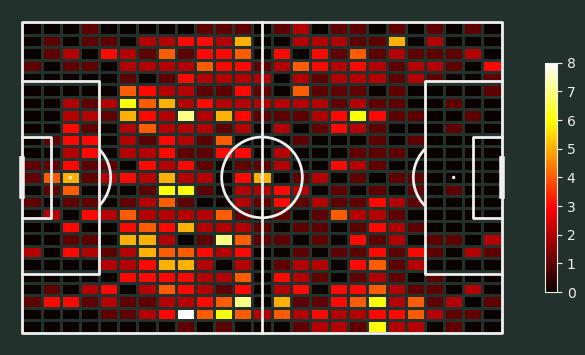

In [37]:
from mplsoccer import Pitch
import matplotlib.pyplot as plt
from scipy.ndimage import gaussian_filter
# setup pitch
pitch = Pitch(pitch_type='wyscout', line_zorder=2,
              pitch_color='#22312b', line_color='#efefef')
# draw
fig, ax = pitch.draw(figsize=(6.6, 4.125))
fig.set_facecolor('#22312b')
bin_statistic = pitch.bin_statistic(locx, locy, statistic='count', bins=(25,25))
#bin_statistic['statistic'] = gaussian_filter(bin_statistic['statistic'], 1)
pcm = pitch.heatmap(bin_statistic, ax=ax, cmap='hot', edgecolors='#22312b')
# Add the colorbar and format off-white
cbar = fig.colorbar(pcm, ax=ax, shrink=0.6)
cbar.outline.set_edgecolor('#efefef')
cbar.ax.yaxis.set_tick_params(color='#efefef')
ticks = plt.setp(plt.getp(cbar.ax.axes, 'yticklabels'), color='#efefef')

# Analysis of the passes of England

In [80]:
passes = df_events[(df_events['type.primary']=='pass')&(df_events['team.name']=='England')]
initialx = passes['location.x']
initialy = passes['location.y']
finalx = passes['pass.endLocation.x']
finaly = passes['pass.endLocation.y']

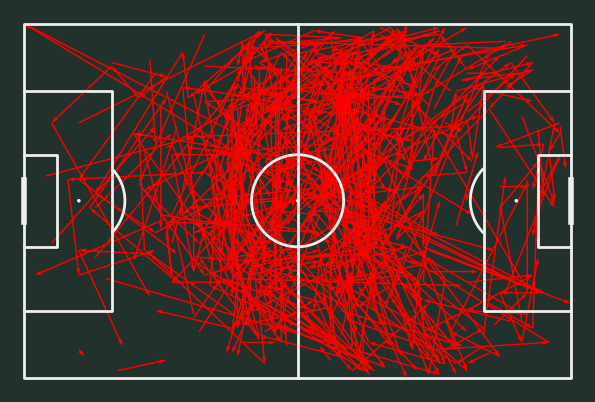

In [81]:
pitch = Pitch(pitch_type='wyscout', line_zorder=2,
              pitch_color='#22312b', line_color='#efefef')
# draw
fig, ax = pitch.draw(figsize=(6.6, 4.125))
fig.set_facecolor('#22312b')
pitch.arrows(initialx, initialy, finalx, finaly, ax=ax, color='red', width=1)